Load ratings + movies; check shapes, nulls, dtypes, duplicates.

Basic profiles:

ratings per user/movie (plots), rating distribution, sparsity %.

time distribution (if timestamps available).

Quick insights: top genres, most‑rated titles, long‑tail effect.

Now working in: C:\Users\Emmet\PycharmProjects\streaming-recs-project


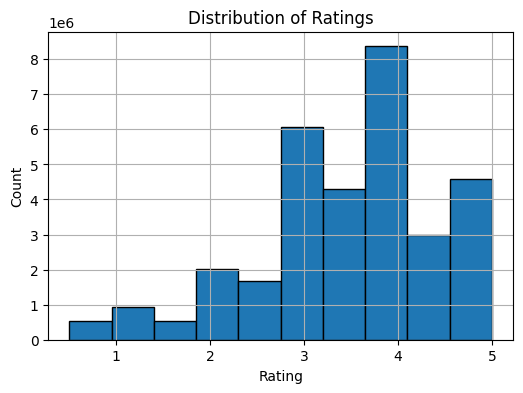

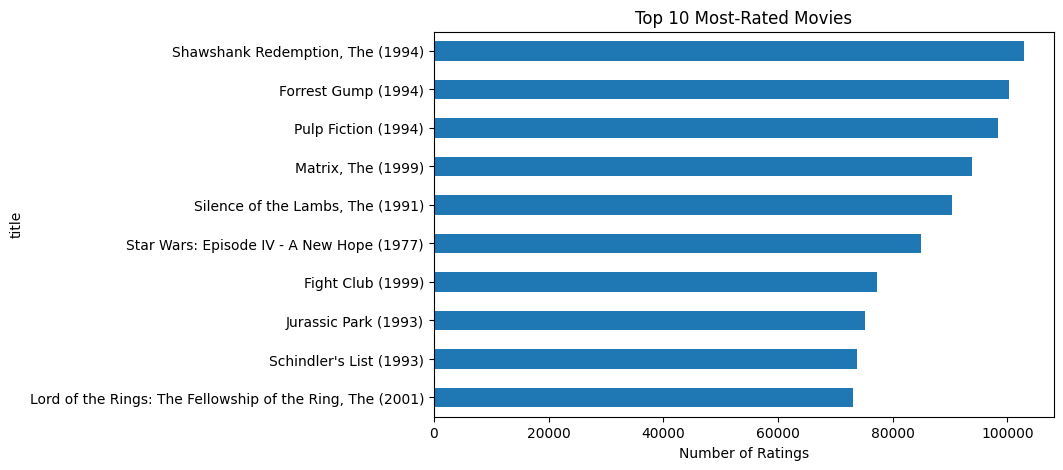

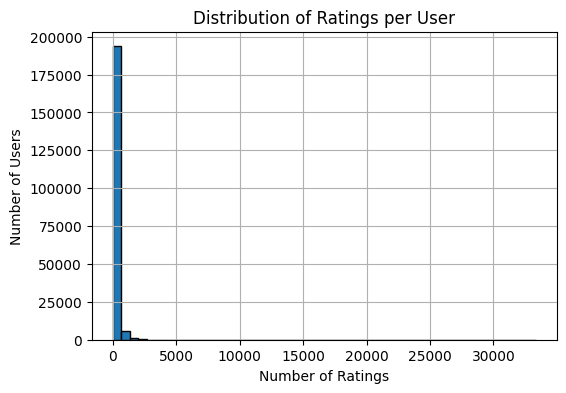

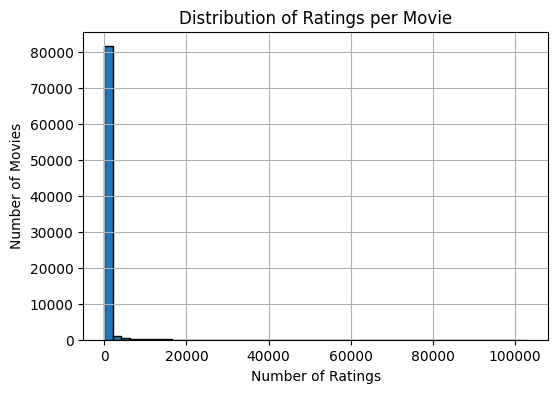

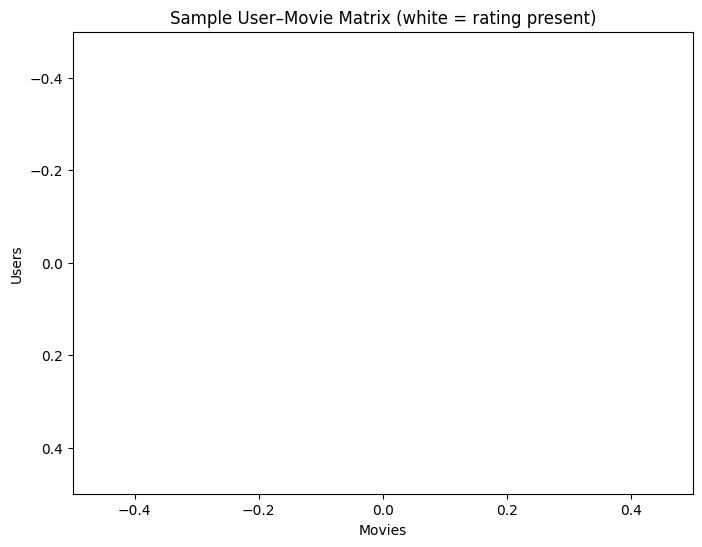

Number of users: 200948
Number of movies: 84432
Number of ratings: 32000204
Sparsity: 0.9981


In [6]:
import pandas as pd
import os
import numpy as np
os.chdir(r"C:\Users\Emmet\PycharmProjects\streaming-recs-project")
print("Now working in:", os.getcwd())
ratings = pd.read_csv('data/ml32/ratings.csv')
movies = pd.read_csv('data/ml32/movies.csv')
df = ratings.merge(movies, on='movieId', how='left')

# sparsity
n_users = df['userId'].nunique()
n_items = df['movieId'].nunique()
sparsity = 1 - (len(df)/ (n_users*n_items))


#check data
import matplotlib.pyplot as plt

# Histogram of rating values
plt.figure(figsize=(6,4))
df['rating'].hist(bins=10, edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 most-rated movies
top_movies = (
    df.groupby('title')['rating']
      .count()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,5))
top_movies.plot(kind='barh')
plt.title("Top 10 Most-Rated Movies")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()  # so the top movie is at the top
plt.show()

# Ratings per user
ratings_per_user = df.groupby('userId')['rating'].count()
plt.figure(figsize=(6,4))
ratings_per_user.hist(bins=50, edgecolor='black')
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# Ratings per movie
ratings_per_movie = df.groupby('movieId')['rating'].count()

plt.figure(figsize=(6,4))
ratings_per_movie.hist(bins=50, edgecolor='black')
plt.title("Distribution of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

# Create a small sample of users and movies for plotting
sample_users = np.random.choice(df['userId'].unique(), size=30, replace=False)
sample_movies = np.random.choice(df['movieId'].unique(), size=30, replace=False)

sample_df = df[df['userId'].isin(sample_users) & df['movieId'].isin(sample_movies)]
pivot_sample = sample_df.pivot(index='userId', columns='movieId', values='rating')

plt.figure(figsize=(8,6))
plt.imshow(pivot_sample.notna(), aspect='auto', cmap='Greys', interpolation='nearest')
plt.xlabel("Movies")
plt.ylabel("Users")
plt.title("Sample User–Movie Matrix (white = rating present)")
plt.show()

#summary Table
print(f"Number of users: {n_users}")
print(f"Number of movies: {n_items}")
print(f"Number of ratings: {len(df)}")
print(f"Sparsity: {sparsity:.4f}")
